In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(r'kz.csv')

In [2]:
df.head()

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id
0,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18
1,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18
2,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18
3,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18
4,2020-04-24 19:16:21 UTC,2294584263154074236,2273948316817424439,2.268105e+18,NaN,karcher,217.57,1.515916e+18


In [3]:
df.shape

(2633521, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2633521 entries, 0 to 2633520
Data columns (total 8 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   order_id       int64  
 2   product_id     int64  
 3   category_id    float64
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        float64
dtypes: float64(3), int64(2), object(3)
memory usage: 160.7+ MB


In [5]:
df['user_id'].value_counts()

1.515916e+18    635
1.515916e+18    632
1.515916e+18    584
1.515916e+18    583
1.515916e+18    579
               ... 
1.515916e+18      1
1.515916e+18      1
1.515916e+18      1
1.515916e+18      1
1.515916e+18      1
Name: user_id, Length: 98262, dtype: int64

In [6]:
df.isnull().sum()

event_time             0
order_id               0
product_id             0
category_id       431954
category_code     612202
brand             506005
price             431954
user_id          2069352
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df['user_id'] = df['user_id'].astype('int64')

In [10]:
df['event_time'] = pd.to_datetime(df['event_time'])

In [11]:
df.groupby(df['event_time'].dt.year).agg({'price':'sum'})

,price
event_time,
1970,1.582315e+05
2020,1.066715e+08


In [12]:
df = df[df['event_time'].dt.year==2020]

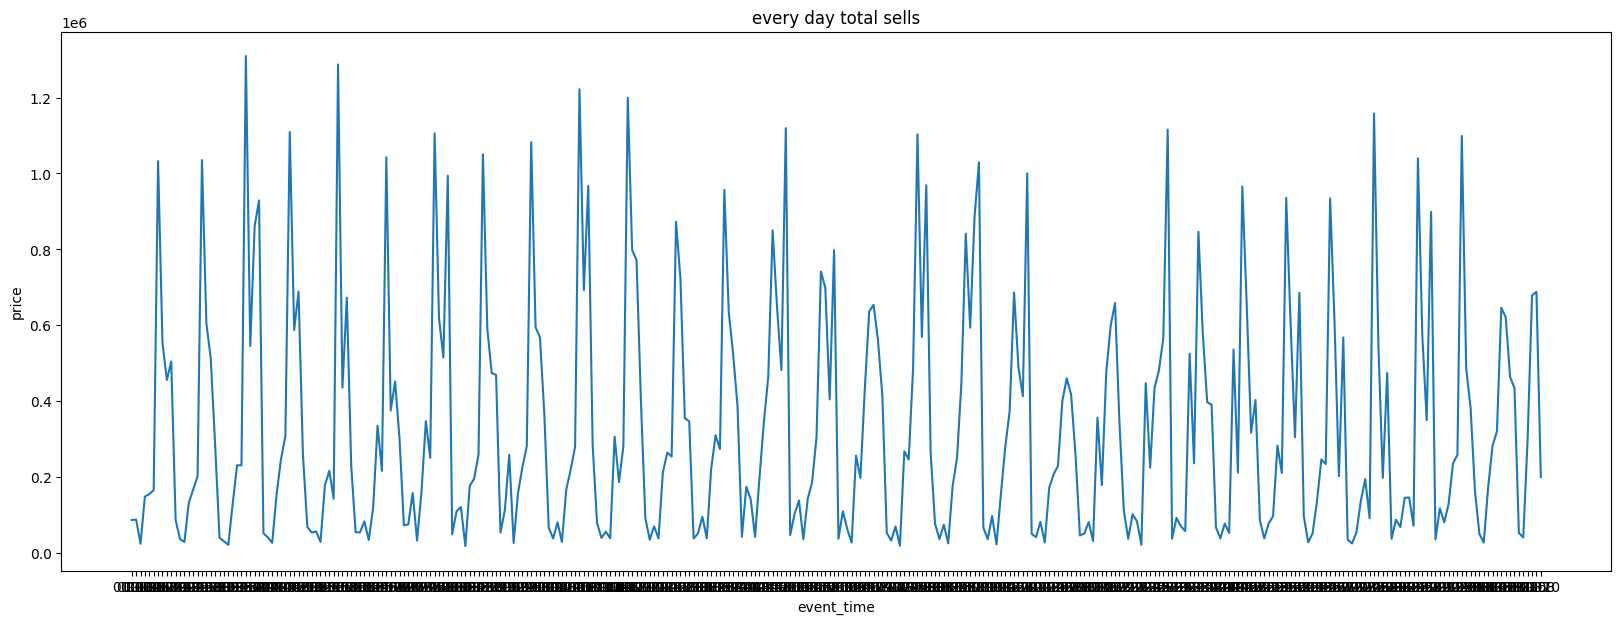

In [13]:
plt.figure(figsize=(20,7))
total_sells_byday = df.groupby(df['event_time'].dt.strftime('%d-%m')).agg({'price':'sum'}).reset_index()
sns.lineplot(data=total_sells_byday,x='event_time',y='price')
plt.title('every day total sells')
plt.show()

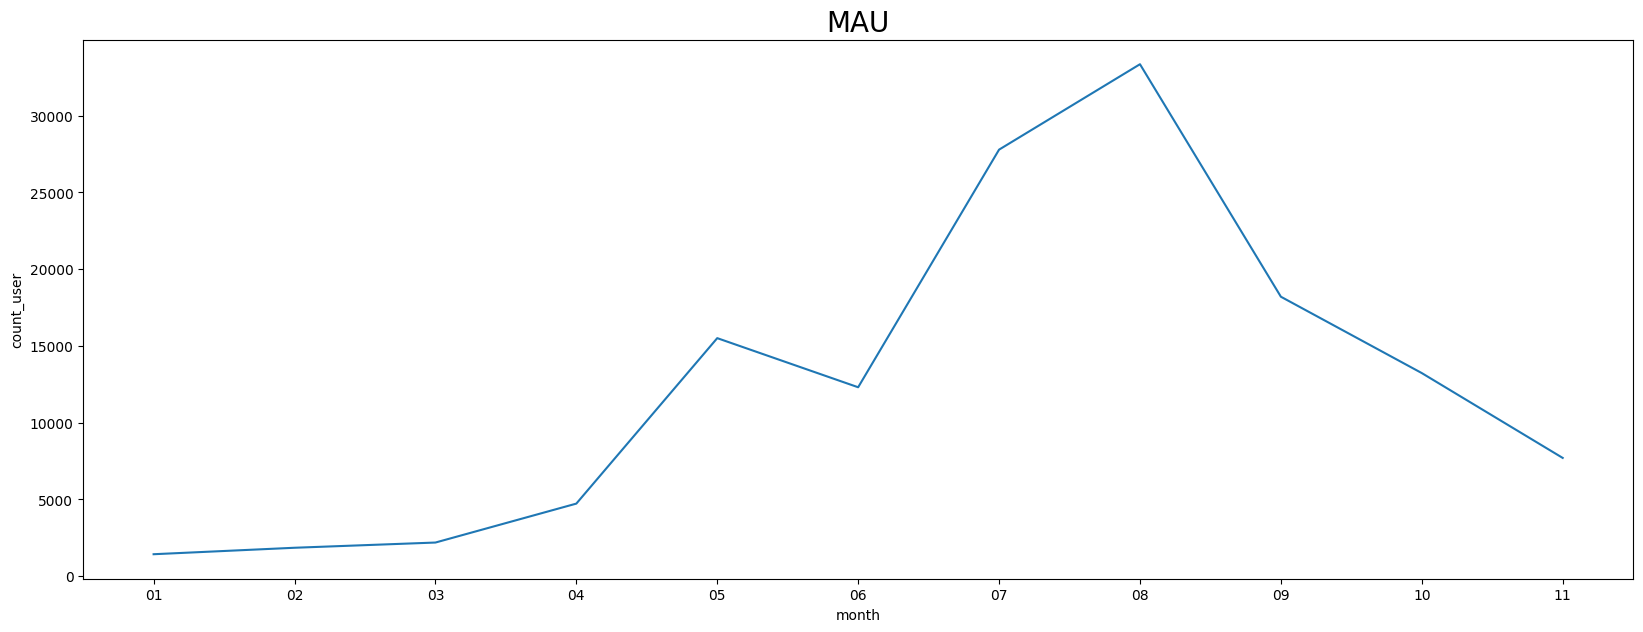

In [14]:
plt.figure(figsize=(20,7))
mau = df.groupby(df['event_time'].dt.strftime('%m')).agg({'user_id':'nunique'}).reset_index() \
    .sort_values('event_time').rename({'user_id':'count_user','event_time':'month'},axis=1)
sns.lineplot(data=mau,x='month',y='count_user')
plt.title('MAU',fontsize=20)
plt.show()

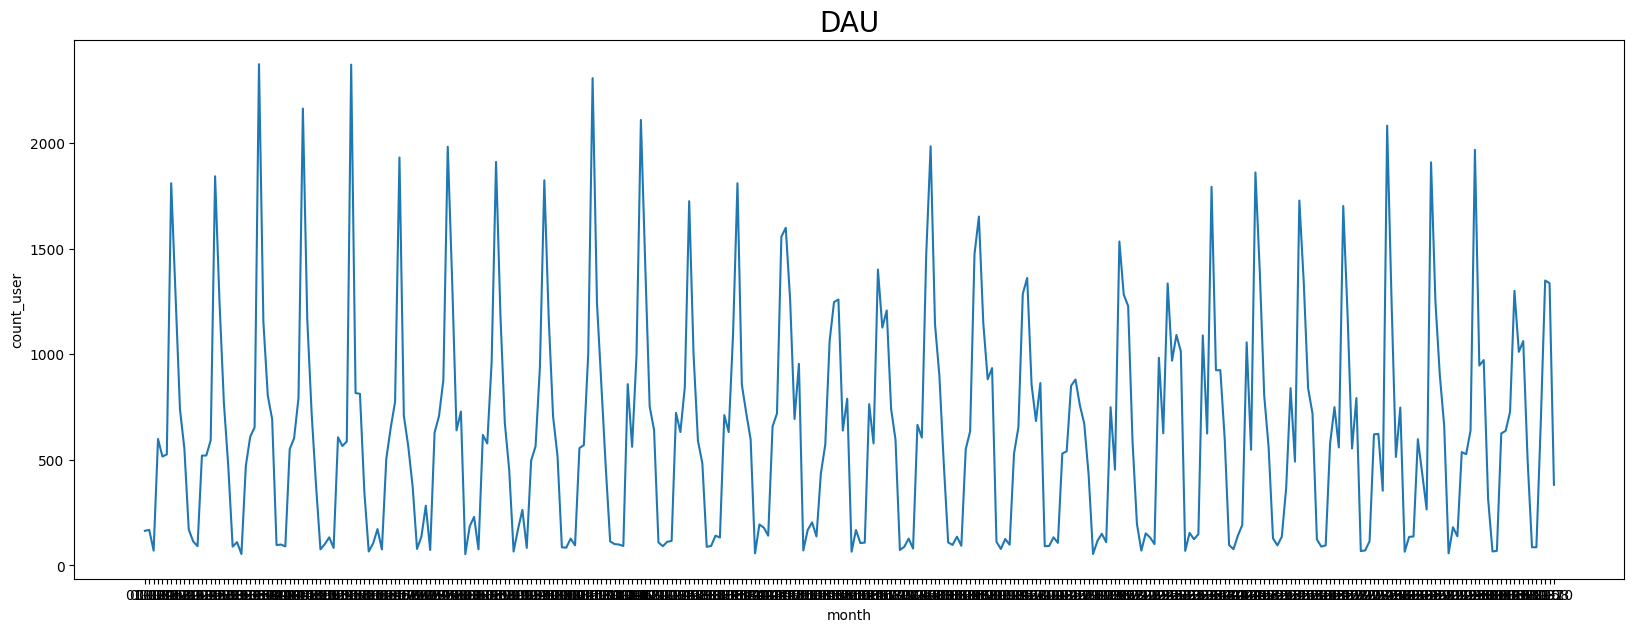

In [15]:
plt.figure(figsize=(20,7))
dau = df.groupby(df['event_time'].dt.strftime('%d-%m')).agg({'user_id':'nunique'}).reset_index() \
    .sort_values('event_time').rename({'user_id':'count_user','event_time':'month'},axis=1)
sns.lineplot(data=dau,x='month',y='count_user')
plt.title('DAU',fontsize=20)
plt.show()

In [16]:
spends = df.groupby(df['event_time'].dt.strftime('%d-%m')).agg({'price':'sum'}).reset_index() \
    .sort_values('event_time')#.groupby(df['event_time'].dt.day).agg({'price':'mean'}).reset_index()
#spends['event_time'] = pd.to_datetime(spends['event_time'],format='%d-%m')
mean_spends_by_day =spends.groupby(spends['event_time'].apply(lambda x:x[:2])).agg({'price':'mean'}).reset_index()

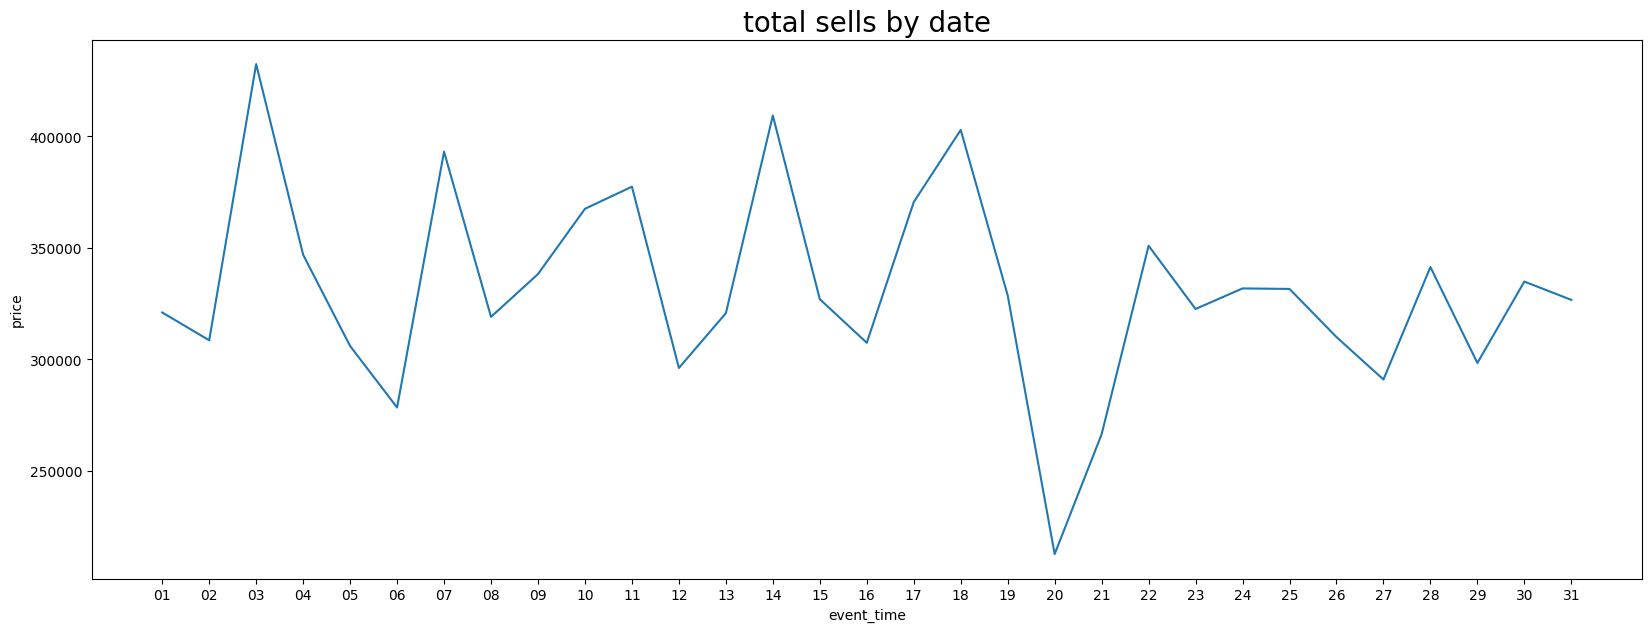

In [17]:
plt.figure(figsize=(20,7))
sns.lineplot(data=mean_spends_by_day,x='event_time',y='price')
plt.title('total sells by date',fontsize=20)
plt.show()

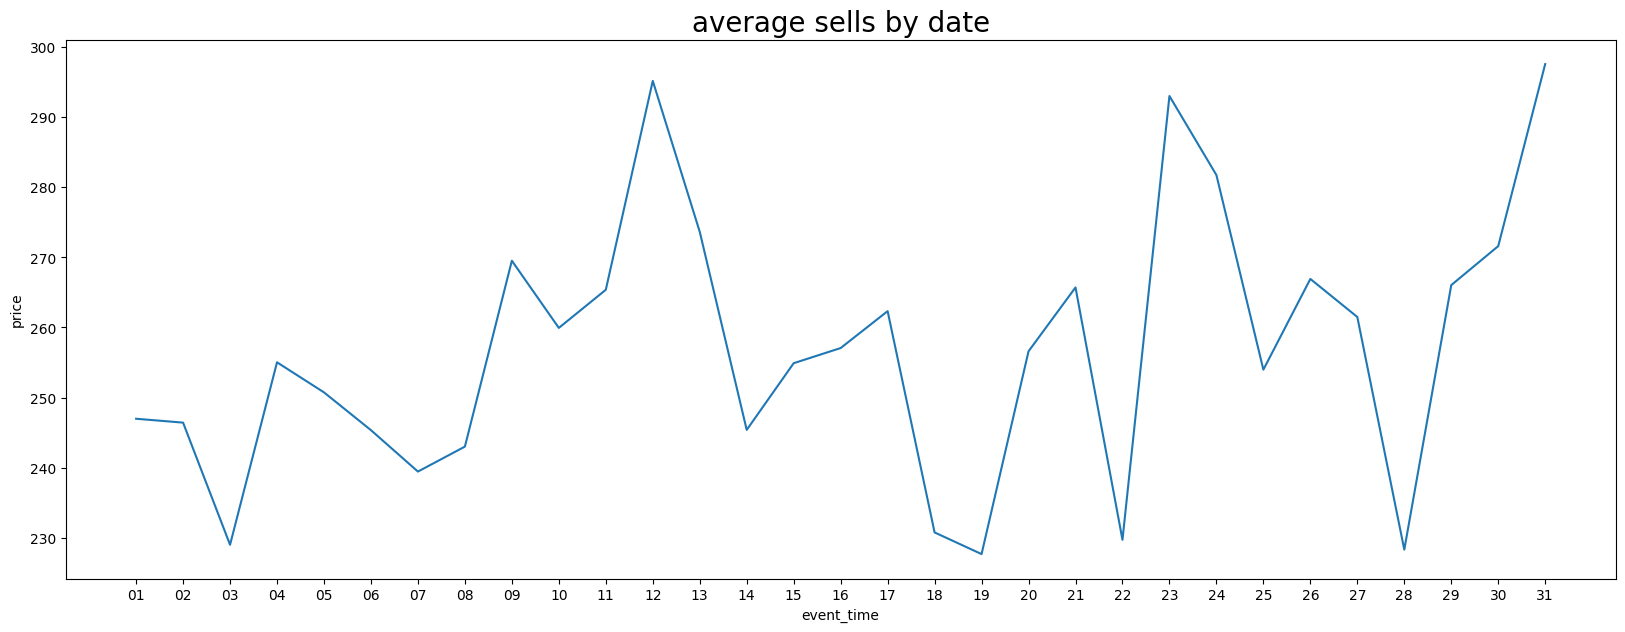

In [18]:

x = df.groupby(df['event_time'].dt.strftime('%d')).agg({'price':'mean'}).reset_index() \
    .sort_values('event_time')
plt.figure(figsize=(20,7))
sns.lineplot(data=x,x='event_time',y='price')
plt.title('average sells by date',fontsize=20)
plt.show()

# top companies

In [80]:
top_brands = df.groupby('brand',as_index=False).agg({'price':'sum'}).sort_values('price',ascending=False)

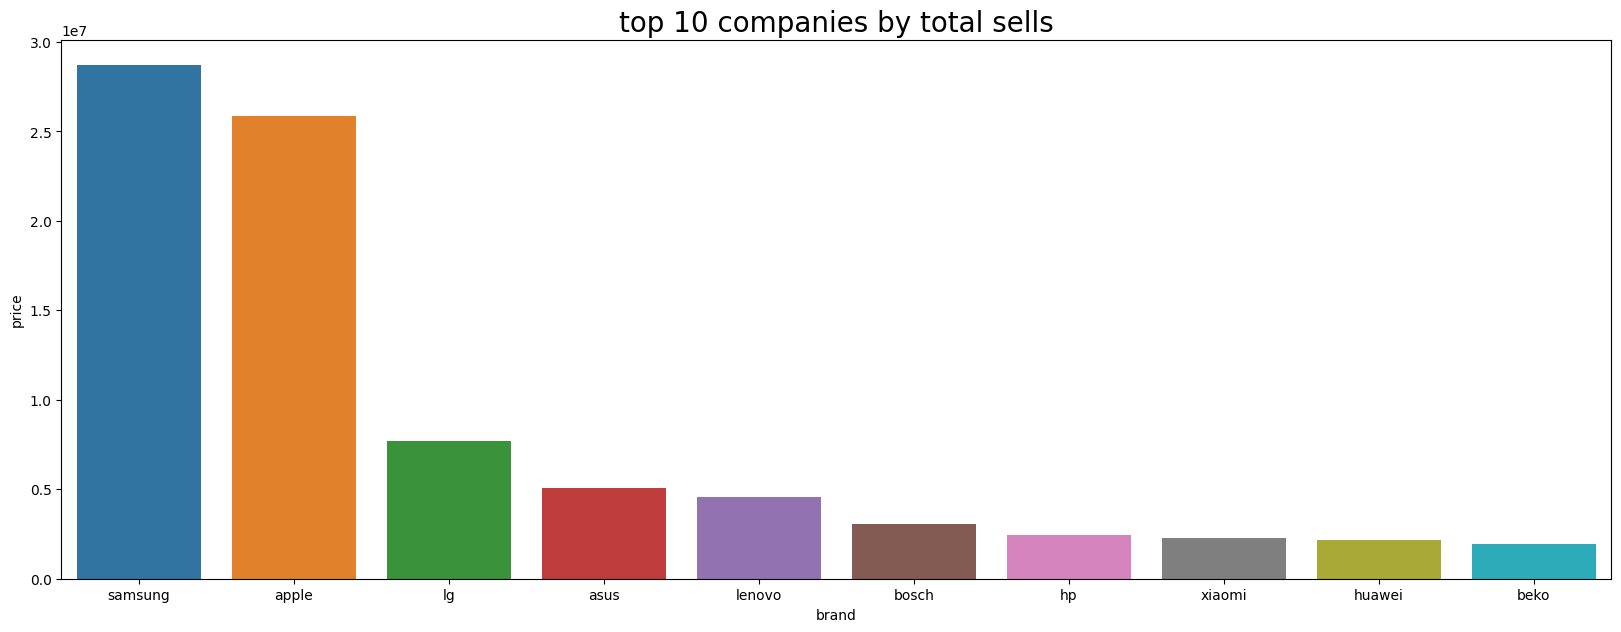

In [81]:
plt.figure(figsize=(20,7))
sns.barplot(data=top_brands[:10],x='brand',y='price')
plt.title('top 10 companies by total sells',fontsize=20)
plt.show()

In [82]:
top_brands.loc[(top_brands['price']/sum(top_brands['price'])*100)<1.5,'brand']='others'

In [83]:
top_brands = top_brands.groupby('brand').agg({'price':'sum'}).reset_index()

In [84]:
top_brands

,brand,price
0,apple,25884146.70
1,asus,5071122.71
2,ava,1619254.76
3,beko,1934594.89
4,bosch,3053915.61
5,hp,2464512.66
6,huawei,2184250.46
7,lenovo,4562666.11
8,lg,7718930.68
9,oppo,1684125.44


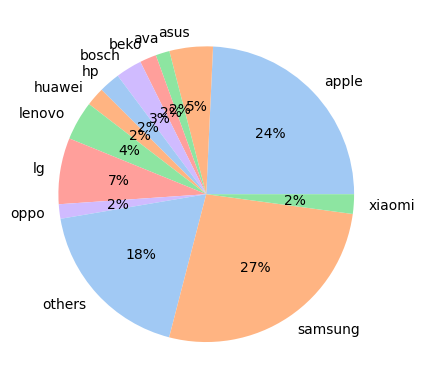

In [87]:
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(top_brands['price'], labels = top_brands['brand'], colors = colors, autopct='%.0f%%')
plt.title
plt.show()

In [137]:
brand_sells_date = df[df['brand'].isin(top_brands['brand'])].groupby(['brand',df['event_time'].dt.strftime('%W-%b')]).agg({'price':['sum','mean']}).reset_index()

In [138]:
brand_sells_date = brand_sells_date.droplevel(0,axis=1)
brand_sells_date['month'] = brand_sells_date.iloc[:,1]
brand_sells_date['brand'] = brand_sells_date.iloc[:,0]
brand_sells_date = brand_sells_date.drop([''],axis=1)

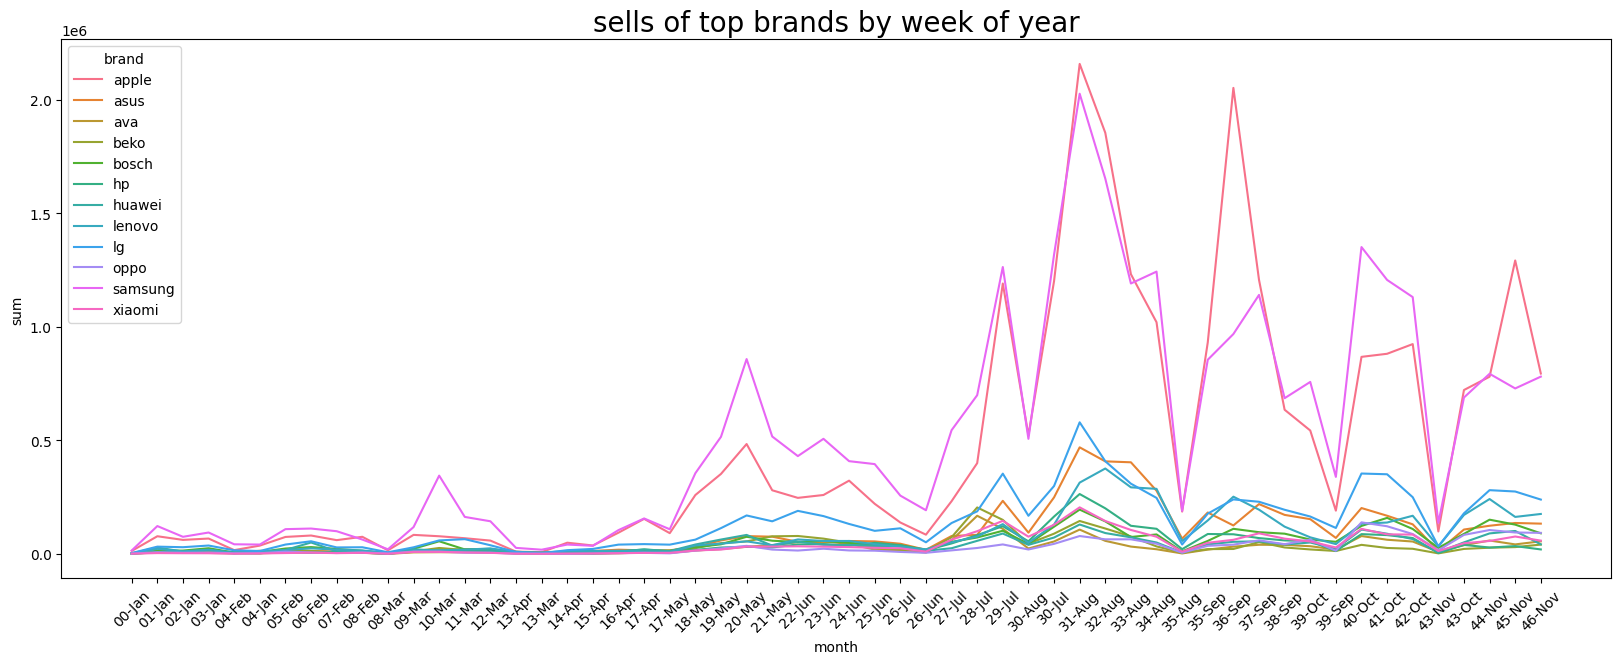

In [140]:
plt.figure(figsize=(20,7))
sns.lineplot(brand_sells_date,x='month',y='sum',hue='brand')
plt.xticks(rotation=45)
plt.title('sells of top brands by week of year',fontsize=20)
plt.show()

# top categories

In [52]:
# top categories by total  sells
df.groupby(['category_code','brand'],as_index=False).agg({'price':'sum'}).sort_values('price',ascending=False)[:10]

,category_code,brand,price
977,electronics.smartphone,apple,19163221.51
990,electronics.smartphone,samsung,16203110.72
657,computers.notebook,asus,4699457.65
676,computers.notebook,lenovo,4507154.41
1049,electronics.video.tv,samsung,3903495.59
656,computers.notebook,apple,3292571.10
1042,electronics.video.tv,lg,3282657.46
381,appliances.kitchen.refrigerators,samsung,2191618.54
417,appliances.kitchen.washer,samsung,2058715.88
414,appliances.kitchen.washer,lg,1950491.25


In [53]:
top_categories=df['category_code'].value_counts()[:10].reset_index().rename({'index':'category','category_code':'amount'},axis=1)

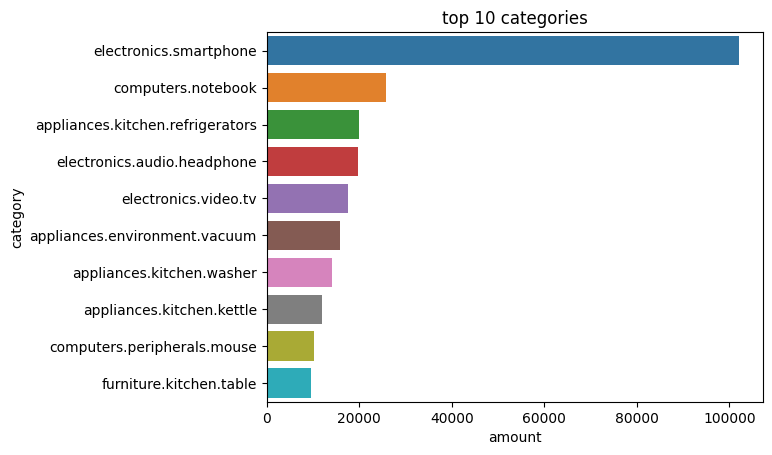

In [54]:
sns.barplot(data=top_categories,x='amount',y='category')
plt.title('top 10 categories')
plt.show()

In [161]:
category_sell_week = df[df['category_code'].isin(top_categories['category'])].groupby(['category_code',df['event_time'].dt.strftime('%W-%b')]).agg({'category_code':'count'}) \
    .rename(columns={'category_code':'amount'}).reset_index() 

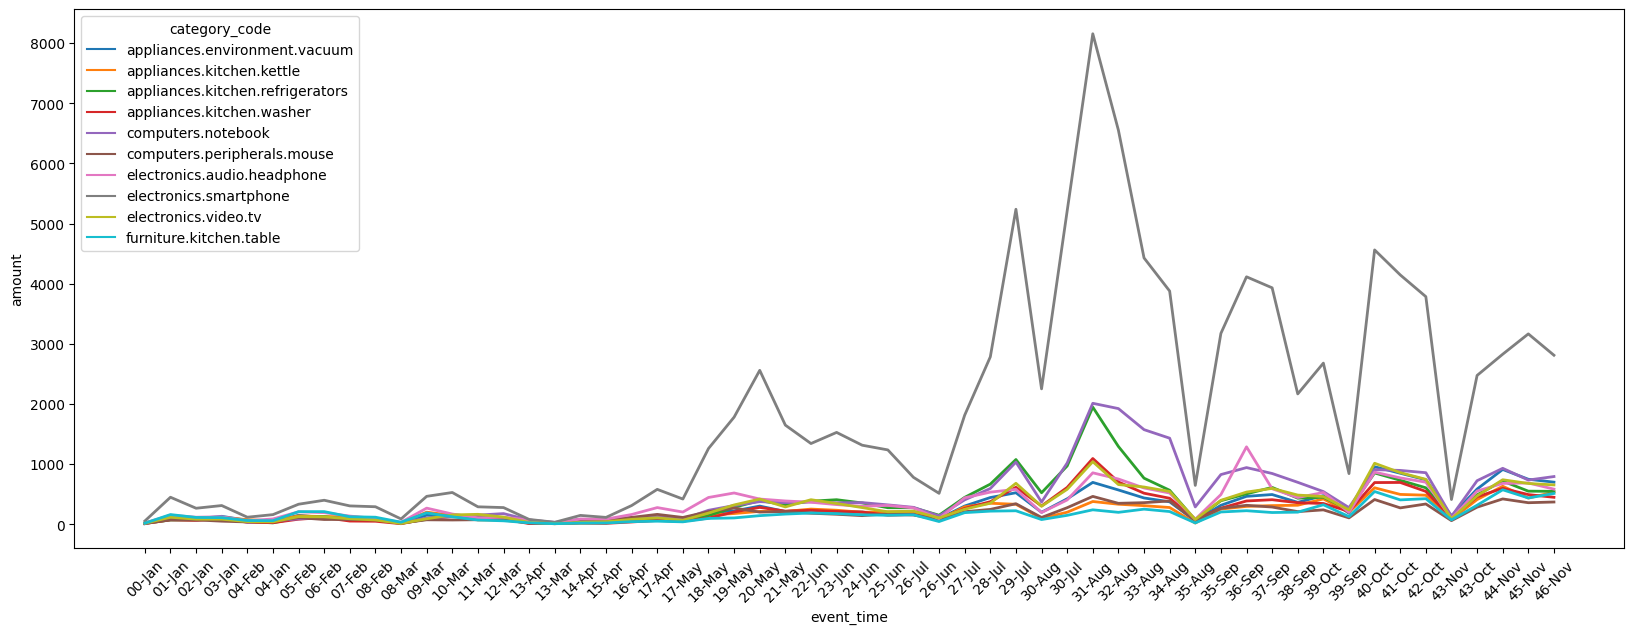

In [166]:
colors = sns.color_palette('bright')[0:10]
plt.figure(figsize=(20,7))
sns.lineplot(data=category_sell_week,x='event_time',y='amount',hue='category_code',color=colors,lw=2)
plt.xticks(rotation=45)
plt.show()